<a href="https://colab.research.google.com/github/samarthagawade/Data-Analyst-Job-Finance-Analyst-/blob/main/Analyst_job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('DataAnalyst.csv')
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [ ]:
#drop columns (Unnamed: 0,Founded,Competitors)
df = df.drop(['Unnamed: 0', 'Founded', 'Competitors'], axis=1)

In [ ]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True


In [ ]:
df.isnull().sum()

,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,1
Location,0
Headquarters,0
Size,0
Type of ownership,0
Industry,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Type of ownership  2253 non-null   object 
 9   Industry           2253 non-null   object 
 10  Sector             2253 non-null   object 
 11  Revenue            2253 non-null   object 
 12  Easy Apply         2253 non-null   object 
dtypes: float64(1), object(12)
memory usage: 228.9+ KB


In [ ]:
# replacing Job Titles to avoid duplicates

df['Job Title'] =df['Job Title'].replace([
    'Sr. Data Analyst','sr. data analyst', 'Sr Data Analyst',
    'sr dataanalyst','senior data analyst', 'Senior Data Analyst',
    'DataAnalyst III', 'data analyst iii', 'senior data analyst'],
    'Senior Data Analyst', regex=True)

df['Job Title'] =df['Job Title'].replace([
    'Data Analyst I', 'dataanalyst i', 'Data Analyst Junior',
    'data analyst junior','Junior DataAnalyst',
    'Junior Data AnalystI', 'Junior Data Analystl'],
     'Junior Data Analyst', regex=True)

df['Job Title'] =df['Job Title'].replace([
    'Data Analyst II','data analyst ii', 'Middle Data Analyst'],
    'Middle Data Analyst', regex=True)

In [ ]:
df = df[df['Salary Estimate'] != '-1']
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\(.*\)', '', regex=True)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '', regex=False)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '', regex=False)
df['Salary Estimate'] = df['Salary Estimate'].str.replace(' ', '', regex=False)

df[['min_salary', 'max_salary']] = df['Salary Estimate'].str.split('-', expand=True)
df['min_salary'] = df['min_salary'].astype(float)
df['max_salary'] = df['max_salary'].astype(float)

df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

overall_avg_salary = df['avg_salary'].mean()

print(f"Average Salary: ${overall_avg_salary:.2f}K per year")


Average Salary: $72.12K per year


/tmp/ipython-input-2826040209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\(.*\)', '', regex=True)
/tmp/ipython-input-2826040209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '', regex=False)
/tmp/ipython-input-2826040209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df.drop(columns=['min_salary', 'max_salary','Salary Estimate'], inplace=True)

/tmp/ipython-input-1430270819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['min_salary', 'max_salary','Salary Estimate'], inplace=True)


In [ ]:
df

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply,avg_salary
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,51.5
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,51.5
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,51.5
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,91.0
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,Company - Public,Wholesale,Business Services,$10+ billion (USD),-1,91.0
2250,"Technical Business Analyst (SQL, Data analytic...","Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,91.0
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,91.0


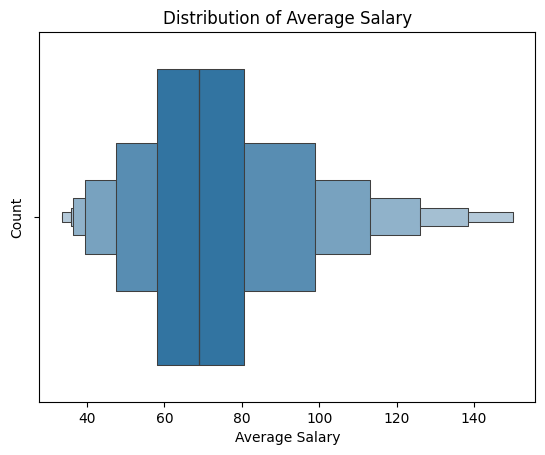

In [ ]:
# Average Salary

sns.boxenplot(data=df, x='avg_salary')
plt.xlabel('Average Salary')
plt.ylabel('Count')
plt.title('Distribution of Average Salary')
plt.show()

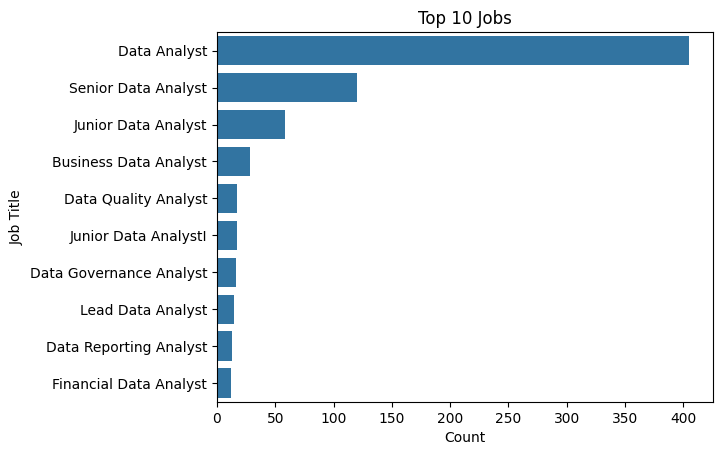

In [ ]:
top_jobs =df['Job Title'].value_counts().head(10)

sns.barplot(x=top_jobs.values, y=top_jobs.index)

plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Jobs')
plt.show()

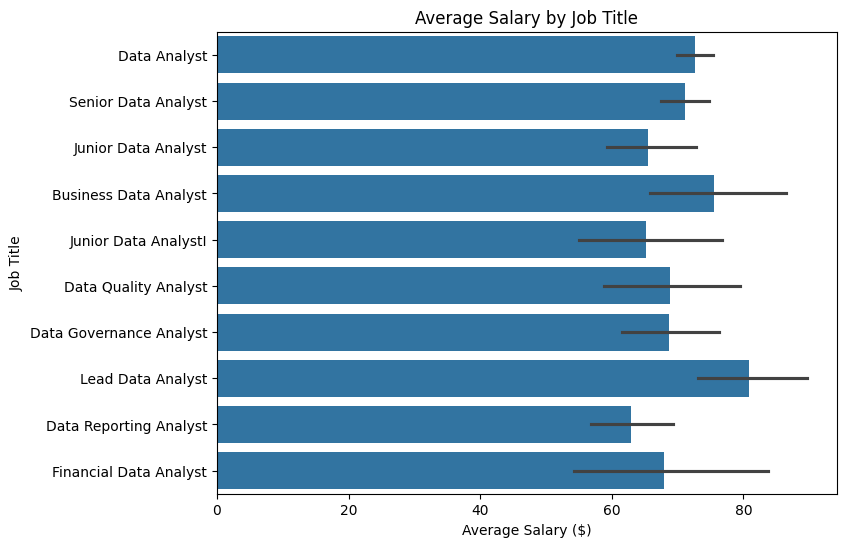

In [ ]:
# Salary and Job Title

data_analyst_jobs_sorted =df.sort_values(by='avg_salary',ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='avg_salary', y='Job Title',
data=data_analyst_jobs_sorted, orient='h',
order=data_analyst_jobs_sorted['Job Title'].value_counts().head(10).index)

plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()

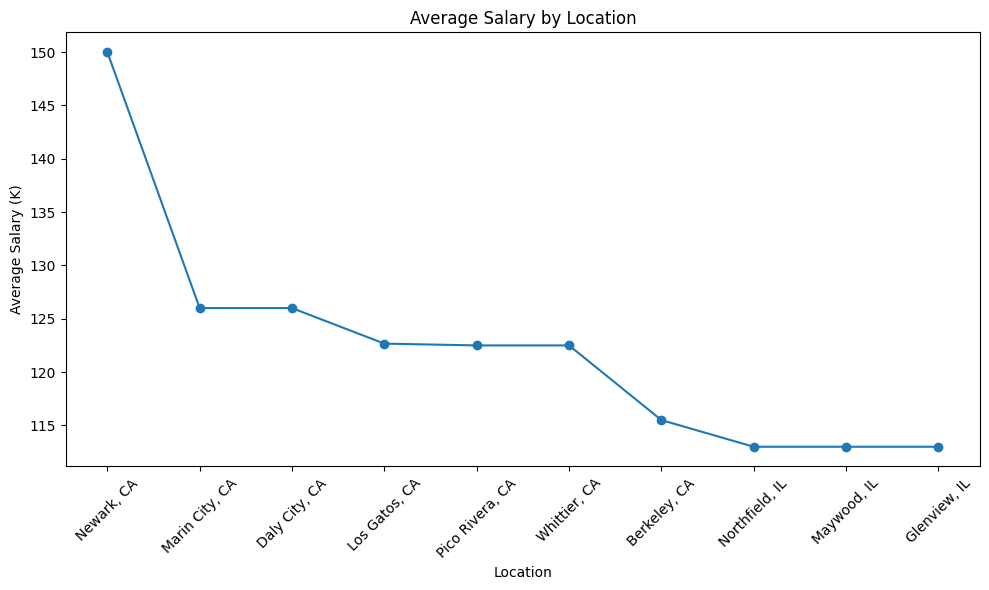

In [ ]:
# Group and find top 10 locations by avg salary
job_location = df.groupby('Location')["avg_salary"].mean().reset_index()
top_10 = job_location.sort_values(by="avg_salary", ascending=False).head(10)

# Correct plotting
plt.figure(figsize=(10,6))
plt.plot(top_10["Location"], top_10["avg_salary"], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Average Salary (K)")
plt.title("Average Salary by Location")
plt.tight_layout()
plt.show()


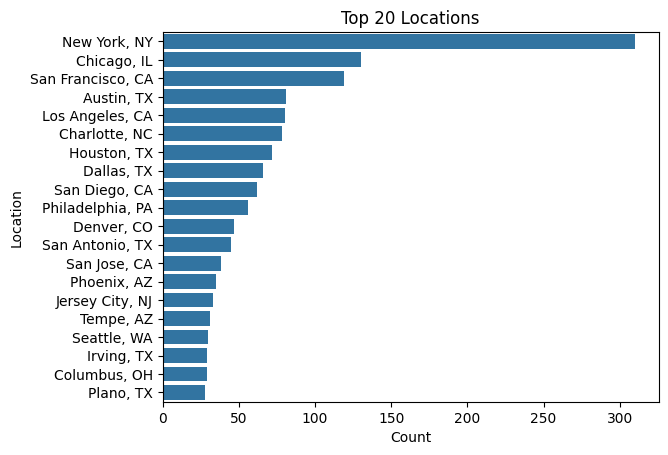

In [ ]:
# Top work locations among interviewed

top_locations =df['Location'].value_counts().head(20)

sns.barplot(x=top_locations.values, y=top_locations.index)

plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 20 Locations')
plt.show()

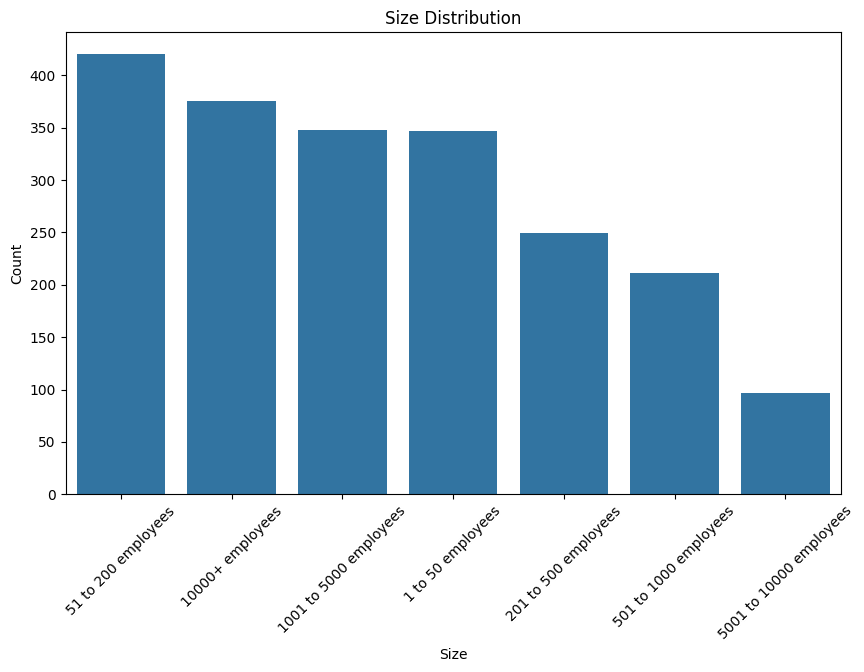

In [ ]:
# Companies by Amount of Employees

filtered_size = df[(df['Size'] !='-1') & (df['Size'] != 'Unknown')]
data_analyst_jobs_size =filtered_size['Size'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=data_analyst_jobs_size.index,
y=data_analyst_jobs_size.values)
plt.xlabel('Size')
plt.ylabel('Count')

plt.title('Size Distribution')
plt.xticks(rotation=45)
plt.show()

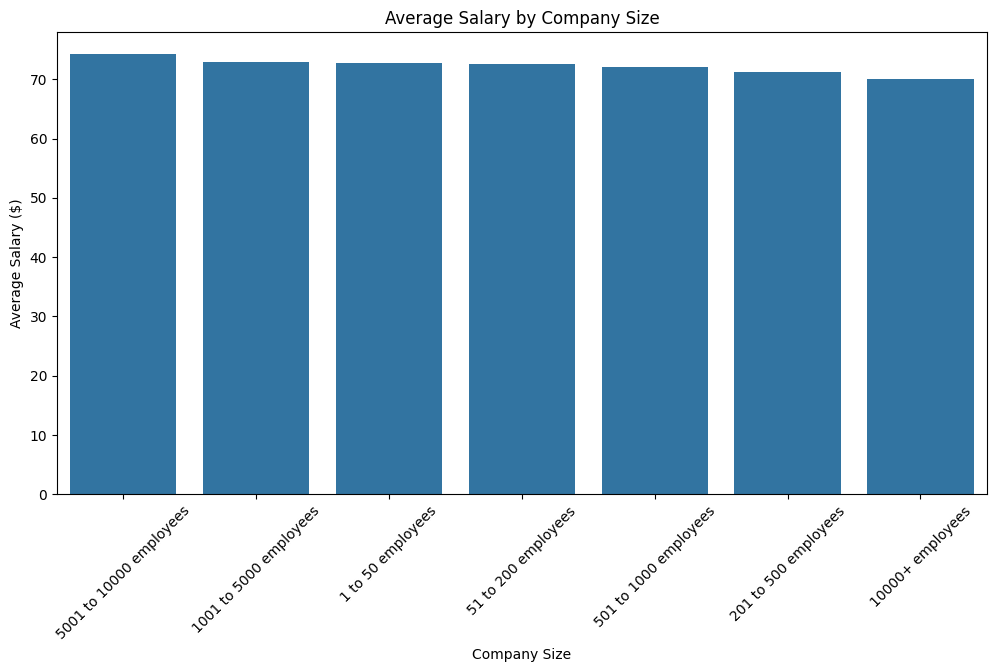

In [ ]:
#salary by company size
data_analyst_jobs_filtered =df[(df['Size'] != '-1') &(df['Size'] != 'Unknown')]
data_analyst_jobs_sizeXsalary =data_analyst_jobs_filtered.groupby('Size')['avg_salary'].mean().reset_index()

# Sort the DataFrame by 'AverageSalary' in descending order
data_analyst_jobs_sizeXsalary =data_analyst_jobs_sizeXsalary.sort_values(by='avg_salary',ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Size', y='avg_salary',data=data_analyst_jobs_sizeXsalary)
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=45)

plt.show()

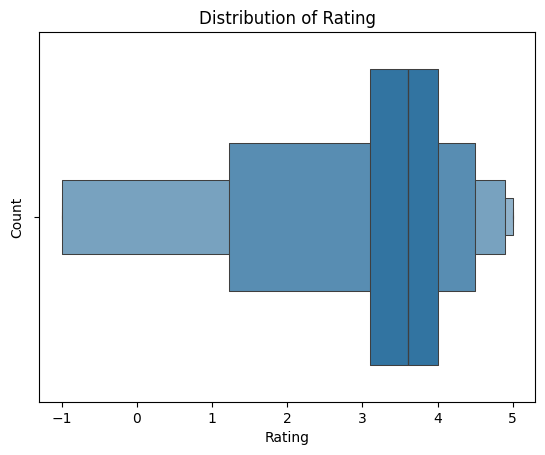

In [ ]:
#company ratings
sns.boxenplot(data=df, x='Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.title('Distribution of Rating')
plt.show()

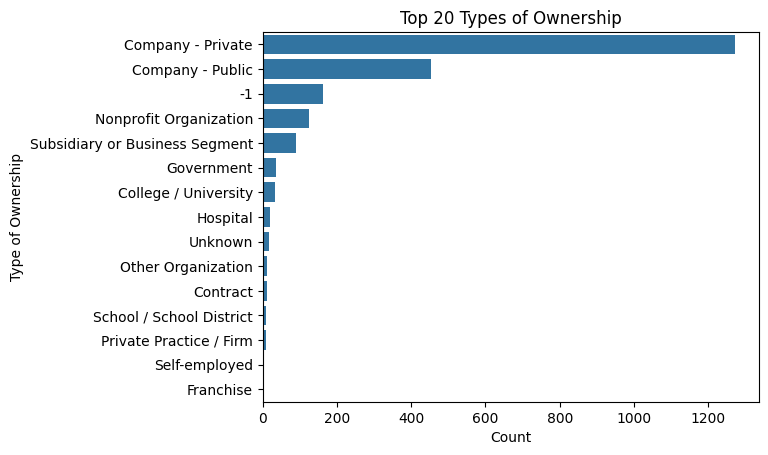

In [ ]:
#top ownerships
TOP = df[(df['Type of ownership']!= '-1') & (df['Type of ownership'] !='Unknown')]

TOP =df['Type of ownership'].value_counts().head(20)

sns.barplot(x=TOP.values, y=TOP.index)

plt.xlabel('Count')
plt.ylabel('Type of Ownership')
plt.title('Top 20 Types of Ownership')
plt.show()

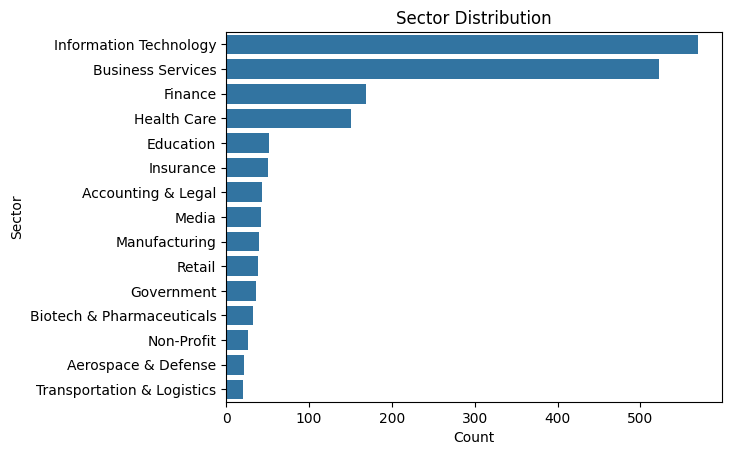

In [ ]:
#top sectors
data_analyst_jobs_sector =df[df['Sector'] !='-1']['Sector'].value_counts().head(15)

sns.barplot(x=data_analyst_jobs_sector.values,y=data_analyst_jobs_sector.index)
plt.xlabel('Count')
plt.ylabel('Sector')

plt.title('Sector Distribution')
plt.show()

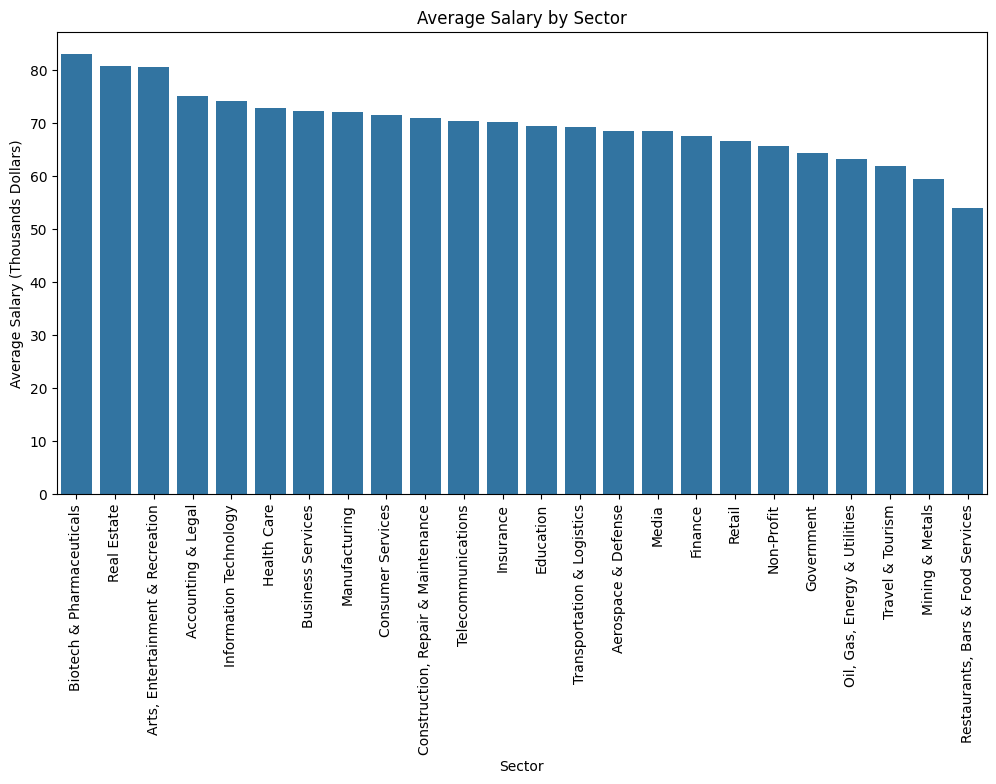

In [ ]:
# Salary by Sector

average_salary_by_sector =df[df['Sector'] !='-1'].groupby('Sector')['avg_salary'].mean().reset_index()

average_salary_by_sector =average_salary_by_sector.sort_values(by='avg_salary',ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='avg_salary',data=average_salary_by_sector)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Average Salary (Thousands Dollars)')

plt.title('Average Salary by Sector')
plt.show()